<a href="https://colab.research.google.com/github/lmansf/Fraud-Detection/blob/main/FraudDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/content/AIML Dataset.csv")

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,777550.000000,7.775500e+05,7.775490e+05,7.775490e+05,7.775490e+05,7.775490e+05,777549.000000,777549.0
mean,20.297277,1.639155e+05,8.832162e+05,9.037185e+05,9.835844e+05,1.136957e+06,0.000581,0.0
std,9.947155,2.682282e+05,2.966068e+06,3.003084e+06,2.316491e+06,2.454600e+06,0.024103,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.296661e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,17.000000,7.944971e+04,1.658400e+04,0.000000e+00,1.240360e+05,2.226350e+05,0.000000,0.0
75%,33.000000,2.200854e+05,1.492481e+05,1.903086e+05,9.136379e+05,1.179049e+06,0.000000,0.0
max,39.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.205466e+07,1.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777550 entries, 0 to 777549
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            777550 non-null  int64  
 1   type            777550 non-null  object 
 2   amount          777550 non-null  float64
 3   nameOrig        777550 non-null  object 
 4   oldbalanceOrg   777549 non-null  float64
 5   newbalanceOrig  777549 non-null  float64
 6   nameDest        777549 non-null  object 
 7   oldbalanceDest  777549 non-null  float64
 8   newbalanceDest  777549 non-null  float64
 9   isFraud         777549 non-null  float64
 10  isFlaggedFraud  777549 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 65.3+ MB


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,777097
1.0,452


In [ ]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,777549


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.shape

(777549, 11)

In [ ]:
round(df["isFraud"].value_counts()[1] / df.shape[0] * 100,2)

np.float64(0.06)

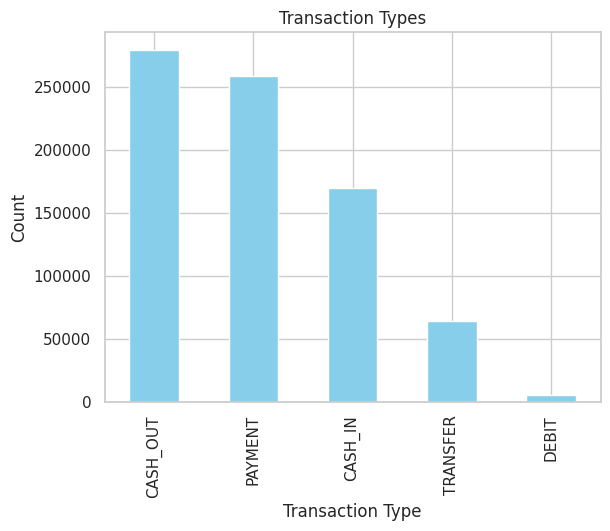

In [ ]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

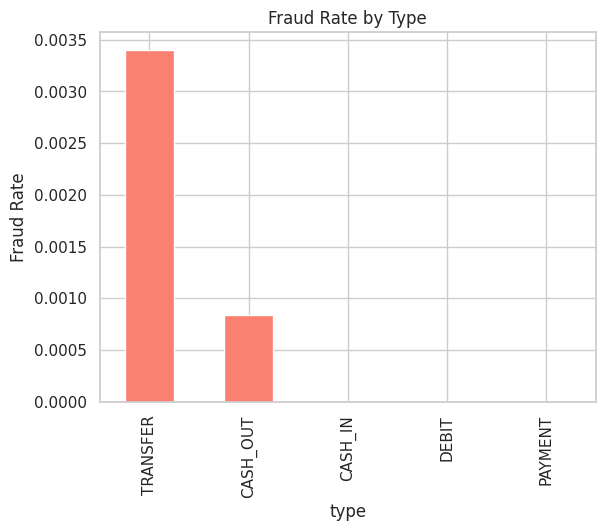

In [ ]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()


In [ ]:
fraud_by_type

,isFraud
type,
TRANSFER,0.003402
CASH_OUT,0.000838
CASH_IN,0.000000
DEBIT,0.000000
PAYMENT,0.000000


In [ ]:
df["amount"].describe().astype(int)

,amount
count,777549
mean,163915
std,268228
min,0
25%,12966
50%,79449
75%,220084
max,10000000


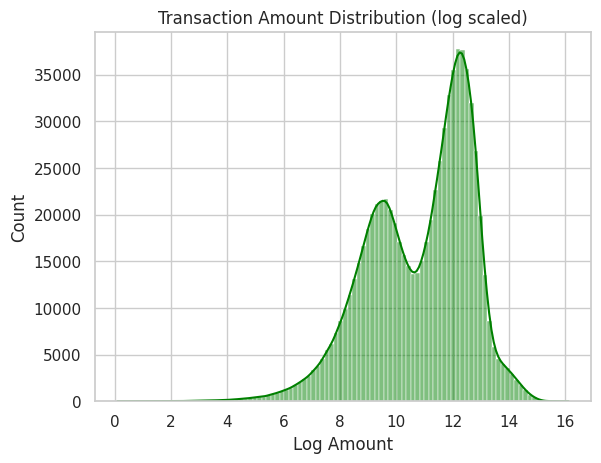

In [ ]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.xlabel("Log Amount")
plt.ylabel("Count")
plt.title("Transaction Amount Distribution (log scaled)")
plt.show()

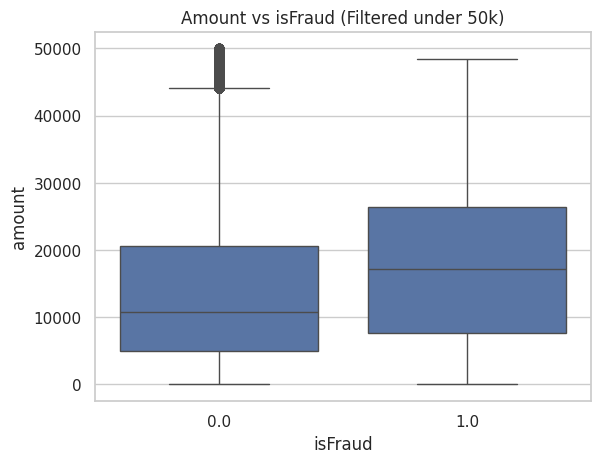

In [ ]:
sns.boxplot(data= df[df["amount"] < 50000], x = "isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [ ]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [ ]:
print((df['balanceDiffOrig'] < 0).sum())

169941


In [ ]:
print((df['balanceDiffDest'] < 0).sum())

152957


In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


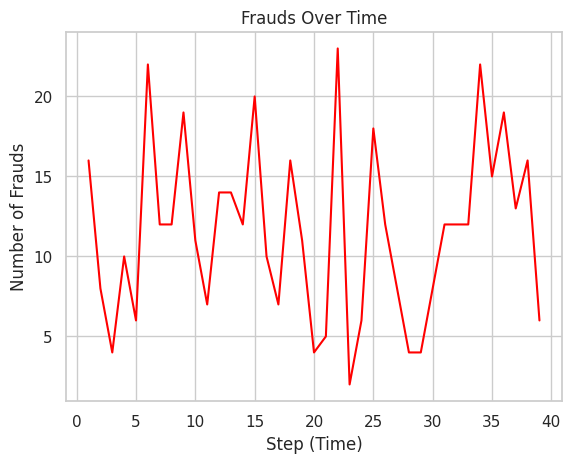

In [ ]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step", color="red")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns="step",inplace=True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [ ]:
top_senders = df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C494623691,2
C1840223033,2
C443788923,2
C1643985626,2
C283104747,2
C1999539787,2
C1162717140,2
C34985720,2
C260230637,2


In [ ]:
top_receivers = df["nameDest"].value_counts().head(10)

In [ ]:
top_receivers

,count
nameDest,
C1286084959,95
C985934102,95
C248609774,88
C665576141,87
C2083562754,86
C1590550415,84
C977993101,80
C1360767589,80
C451111351,78


In [ ]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

,count
nameOrig,
C1507825825,1
C1305486145,1
C840083671,1
C1420196421,1
C1884262933,1
C1907944035,1
C1295812229,1
C151033820,1
C949792674,1


In [ ]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,2712905.89


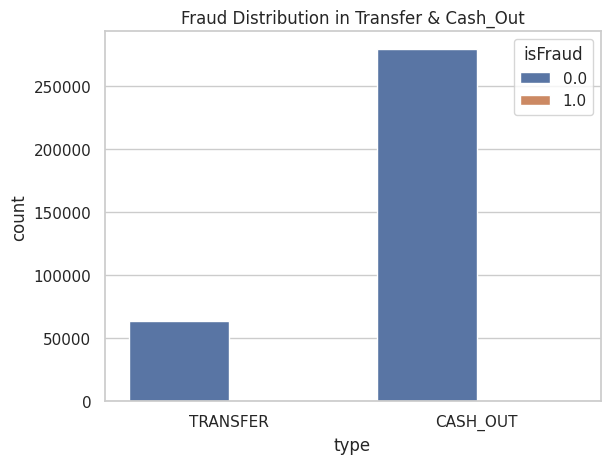

In [ ]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [ ]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","newbalanceDest","isFraud"]].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
amount,1.000000,-0.005504,-0.007529,0.313666,0.068016
oldbalanceOrg,-0.005504,1.000000,0.999208,0.063247,0.000446
newbalanceOrig,-0.007529,0.999208,1.000000,0.062891,-0.006984
newbalanceDest,0.313666,0.063247,0.062891,1.000000,-0.000933
isFraud,0.068016,0.000446,-0.006984,-0.000933,1.000000


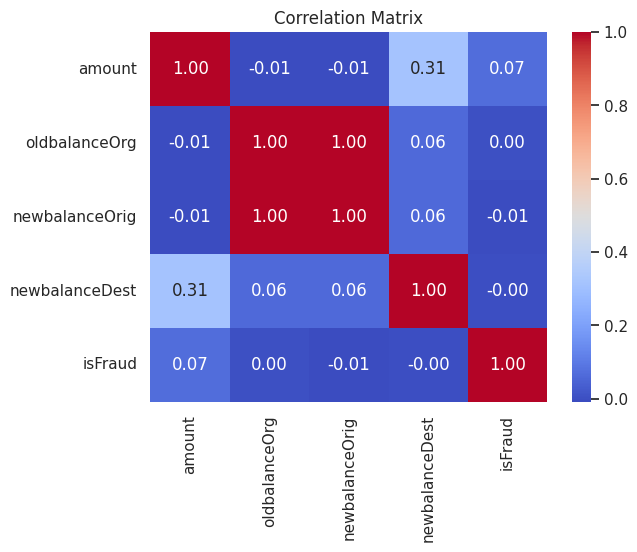

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]  > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

143375

In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,777097
1.0,452


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [ ]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [ ]:
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0.0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0.0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1.0,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1.0,181.00,-21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0.0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
777544,CASH_IN,324724.00,9073443.23,9398167.23,390413.00,65689.01,0.0,-324724.00,-324723.99
777545,CASH_IN,234998.19,9398167.23,9633165.42,563491.82,328493.63,0.0,-234998.19,-234998.19
777546,CASH_IN,215428.40,9633165.42,9848593.82,1685923.60,1470495.20,0.0,-215428.40,-215428.40
777547,CASH_IN,82402.57,9848593.82,9930996.39,132978.62,50576.05,0.0,-82402.57,-82402.57


In [ ]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [ ]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)


In [ ]:
pipeline = Pipeline(
    [
        ("prep", preprocessor),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]
)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    233129
         1.0       0.01      0.96      0.01       136

    accuracy                           0.89    233265
   macro avg       0.50      0.92      0.48    233265
weighted avg       1.00      0.89      0.94    233265



In [ ]:
confusion_matrix(y_test,y_pred)

array([[208292,  24837],
       [     6,    130]])

In [ ]:
pipeline.score(X_test,y_test) * 100

89.34988103658928

In [ ]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

In [ ]:
loaded_model = joblib.load("/content/fraud_detection_pipeline.pkl")
loaded_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])